# Gradyan İnişi

Bu egzersizde, tek bir Gradyan İnişi Epoch'unun adımlarını gerçekleştirmek için gerekli fonksiyonları oluşturacaksınız. Daha sonra fonksiyonları birleştirecek ve tüm Gradyan İnişi prosedürü boyunca bir döngü oluşturacaksınız.

## 1. Veri Keşfi

Sizin için mineral içerikleri olan malzemelerin aşağıdaki veri setini içe aktaracağız

In [1]:
import pandas as pd

data = pd.read_csv("https://d32aokrjazspmn.cloudfront.net/materials/gradient_descent_ingredients_zinc_phosphorous.csv")
data.head()

,aliment,zinc,phosphorus
0,Durum wheat pre-cooked. whole grain. cooked. u...,0.120907,0.193784
1,Asian noodles. plain. cooked. unsalted,0.047859,0.060329
2,Rice. brown. cooked. unsalted,0.156171,0.201097
3,Rice. cooked. unsalted,0.065491,0.045704
4,Rice. parboiled. cooked. unsalted,0.025189,0.045704


👇 `Fosfor` ve `Çinko` arasında bir nebze Doğrusal bir ilişkiyi görselleştirebiliriz.   

Aralarında en uygun çizgiyi bulmak için Gradyan İnişi kullanalım!

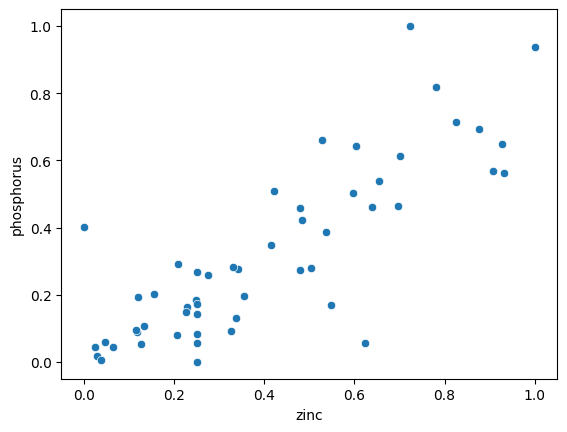

In [2]:
import seaborn as sns

sns.scatterplot(data=data, x='zinc', y='phosphorus');

❓ İki `np.Array` oluşturun
- çinko için `data_X` 
- fosfor için `data_Y`

In [3]:
import numpy as np

data_X = data["zinc"].to_numpy()
data_Y = data["phosphorus"].to_numpy()

In [4]:
assert (data_X.shape == (53,))
assert (data_Y.shape == (53,))

## 2. Bir Epoch Kodlama

Bu egzersizin bu bölümünde, gradyan inişinin bir epoch $\color {red}{(k)}$ sırasında parametreleri güncellemek için kullanılan temel fonksiyonları tanımlayacaksınız. Aşağıdaki formülü hatırlayın

$$
\beta_0^{\color {red}{(k+1)}} = \beta_0^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_0}(\beta^{\color{red}{(k)}})
$$


$$
\beta_1^{\color {red}{(k+1)}} = \beta_1^{\color {red}{(k)}} - \eta \frac{\partial L}{\partial \beta_1}(\beta^{\color {red}{(k)}})
$$

### 2.1 Hipotez Fonksiyonu

$$
\hat{y} =  a x + b
$$

❓ Doğrusal Regresyon hipotez fonksiyonunu tanımlayın. `a`'nın eğim ve `b`'nin y-kesiti olmasına izin verin.

In [5]:
def h(X, a, b):
    return a * X + b

### 2.2 Kayıp Fonksiyonu

$$
Kareler\ Toplamı\ Kaybı = \sum_{i=0}^n (y^{(i)} - \hat{y}^{(i)} )^2
$$

❓ Yukarıdaki denklemi kullanarak Hipotez Fonksiyonu için SSR Kayıp Fonksiyonunu tanımlayın. Yeni fonksiyonunuzu yazarken yukarıda kodlanan `h` fonksiyonunu yeniden kullanın.

In [6]:
import numpy as np

def loss(X, Y, a, b):
    y_pred = h(X, a, b)
    return np.sum((y_pred - Y) ** 2)

In [7]:
loss(data_X, data_Y, 1, 1)

63.868506986115456

❓ Eğer aşağıdaki değerler olsaydı tüm malzemeler veri setimizde hesaplanan toplam Kayıp ne olurdu:
- a = 1 
- b = 1

In [8]:
total_loss = loss(data_X, data_Y, a=1, b=1)
total_loss

63.868506986115456

⚠️ 63.86 değerini alıyor olmalısınız. Eğer almıyorsanız, fonksiyonunuzda bir şeyler yanlış. Devam etmeden önce düzeltin!

### 2.3 Gradyan

$$
\frac{d\ SSR}{d\ eğim}= \sum_{i=0}^n -2  x_i (y^{(i)} - \hat{y}^{(i)} )
$$

$$
\frac{d\ SSR}{d\ y-kesiti}= \sum_{i=0}^n -2(y^{(i)} - \hat{y}^{(i)} ) 
$$

❓ Belirli bir noktada `a` ve `b` parametrelerine göre Kayıp Fonksiyonunun kısmi türevlerini hesaplayan bir fonksiyon tanımlayın.

<details>
<summary>💡 İpucu</summary>
Yine, verilen noktalarda tahminleri hesaplamak için yeni fonksiyonunuzda Hipotez Fonksiyonunu yeniden kullanmalısınız.
</details>

In [9]:
def gradient(X, Y, a, b):
    # Tahmin
    y_pred = h(X, a, b)

    # SSR = sum((y_pred - y)^2)
    # d/da SSR = sum( 2*(y_pred - y) * X )
    # d/db SSR = sum( 2*(y_pred - y) )
    d_a = np.sum(2 * (y_pred - Y) * X)
    d_b = np.sum(2 * (y_pred - Y))

    return d_a, d_b

❓ Fonksiyonunuzu kullanarak, eğer aşağıdaki değerler olsaydı her parametrenin kısmi türevleri ne olurdu:
- a = 1
- b = 1

In [10]:
d_a, d_b = gradient(data_X, data_Y, a=1, b=1)
d_a, d_b

(48.459065809109006, 115.17923733301406)

⚠️ 48.45 ve 115.17 değerlerini alıyor olmalısınız. Eğer almıyorsanız, fonksiyonunuzu düzeltin!

### 2.4 Adım Boyutları

$$
adım\ boyutu = gradyan \cdot öğrenme\ oranı
$$

❓ Her parametre (`a`,`b`) boyunca, türevleri (`d_a`, `d_b`) ve varsayılan olarak `0.01`'e eşit bir `learning_rate`'e göre adım boyutlarını hesaplayan bir fonksiyon tanımlayın

In [11]:
def steps(d_a, d_b, learning_rate=0.01):
    step_a = learning_rate * d_a
    step_b = learning_rate * d_b
    return (step_a, step_b)

❓ (`a`,`b`) = (1,1) için yukarıda hesaplanan türevler için atılacak adımlar (`step_a`, `step_b`) ne olurdu?

In [12]:
step_a, step_b = steps(d_a, d_b)
step_a, step_b

(0.4845906580910901, 1.1517923733301405)

⚠️ Adımlar `a` için 0.48 ve `b` için 1.15 olmalıdır

### 2.5 Parametreleri güncellemek (a, b)

$$
güncellenmiş\ parametre = eski\ parametre\ değeri - adım\ boyutu
$$

❓ Eski parametre değerlerinden ve adım boyutlarından güncellenmiş parametre değerlerini hesaplayan bir fonksiyon tanımlayın.

In [13]:
def update_params(a, b, step_a, step_b):
    a_new = a - step_a
    b_new = b - step_b
    return a_new, b_new

### 2.6 Tam bir epoch

❓ Az önce oluşturduğunuz fonksiyonları kullanarak, aşağıdaki parametrelerle başlamış olsaydınız ilk Epoch'un sonunda güncellenmiş parametreleri hesaplayın:
- a = 1
- b = 1

In [14]:
# Başlangıç
a, b = 1, 1

# 1) Gradient
d_a, d_b = gradient(data_X, data_Y, a, b)

# 2) Steps (learning_rate default 0.01)
step_a, step_b = steps(d_a, d_b)

# 3) Update
updated_a, updated_b = update_params(a, b, step_a, step_b)

updated_a, updated_b

(0.5154093419089099, -0.1517923733301405)

⚠️ Aşağıdaki değerleri alıyor olmalısınız:
   - updated_a = 0.51
   - updated_b = -0.15

## 3. Gradyan İnişi

❓ Artık Gradyan İnişi için gerekli fonksiyonlara sahip olduğunuza göre, yakınsama sağlanana kadar epoch'lar boyunca döngü yapın.

- `a = 1` ve `b = 1` parametrelerini başlatın
- Yakınsamayı **100 epoch** olarak kabul edin
- Her yeni epoch'u güncellenmiş parametrelerle başlatmayı unutmayın
- Her epoch'ta `loss`, `a`, ve `b` değerlerini sırasıyla `loss_history`, `a_history` ve `b_history` adlı listelerine ekleyin

In [15]:
# Başlangıç parametreleri
a, b = 1, 1

# Kayıt listeleri
loss_history = []
a_history = []
b_history = []

# 100 epoch
for epoch in range(100):
    # Kayıp
    current_loss = loss(data_X, data_Y, a, b)
    
    # Gradient
    d_a, d_b = gradient(data_X, data_Y, a, b)
    
    # Step
    step_a, step_b = steps(d_a, d_b)
    
    # Update
    a, b = update_params(a, b, step_a, step_b)
    
    # History
    loss_history.append(current_loss)
    a_history.append(a)
    b_history.append(b)

❓ 100 epoch'un sonundaki parametre değerleri nelerdir? Onları sırasıyla `a_100` ve `b_100` değişkenlerine kaydedin

In [16]:
a_100 = a
b_100 = b

a_100, b_100

(0.768671510620374, 0.00708932115622393)

In [17]:
# 🧪 Test your code
from nbresult import ChallengeResult
result = ChallengeResult('descent',
                         a_100=a_100,
                         b_100=b_100)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/gizemtotkanli/.pyenv/versions/3.12.9/envs/workintech_current/bin/python
cachedir: .pytest_cache
rootdir: /Users/gizemtotkanli/code/totkanligizem/S16D4-S-gradient-descent/tests
plugins: dash-3.3.0, anyio-4.8.0, typeguard-4.4.2
collecting ... collected 2 items

test_descent.py::TestDescent::test_a PASSED                              [ 50%]
test_descent.py::TestDescent::test_b PASSED                              [100%]

============================== 2 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/descent.pickle

git commit -m 'Completed descent step'

git push origin master



## 4. Görsel kontrol

❓ Bu yinelemeli yaklaşımı `gradient_descent()` metoduna sarın, bu metod `new_a`, `new_b` ve şu listeleri içeren bir sözlük olan `history`'yi döndürsün: 
- `loss_history`
- `a_history`
- `b_history`

In [18]:
def gradient_descent(X, Y, a_init=1, b_init=1, learning_rate=0.001, n_epochs=100):
    a, b = a_init, b_init

    loss_history = []
    a_history = []
    b_history = []

    for epoch in range(n_epochs):
        # loss
        current_loss = loss(X, Y, a, b)

        # gradient
        d_a, d_b = gradient(X, Y, a, b)

        # step sizes (learning rate burada)
        step_a, step_b = steps(d_a, d_b, learning_rate=learning_rate)

        # update params
        a, b = update_params(a, b, step_a, step_b)

        # history
        loss_history.append(current_loss)
        a_history.append(a)
        b_history.append(b)

    history = {
        "loss": loss_history,
        "a": a_history,
        "b": b_history
    }

    return a, b, history

❓ Gradyan İniş'inizin parametrelerini kullanarak Çinko ve Fosfor arasında en uygun çizgiyi çizin.

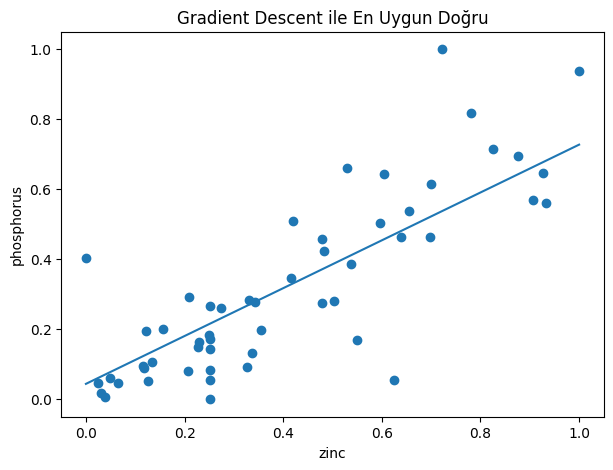

(0.6834909720429545, 0.043907362827260835)

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Gradient Descent'i çalıştır
new_a, new_b, history = gradient_descent(data_X, data_Y, learning_rate=0.001, n_epochs=100)

# Scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(data_X, data_Y)

# En uygun doğru: y = a*x + b
x_line = np.linspace(data_X.min(), data_X.max(), 100)
y_line = h(x_line, new_a, new_b)
plt.plot(x_line, y_line)

plt.xlabel("zinc")
plt.ylabel("phosphorus")
plt.title("Gradient Descent ile En Uygun Doğru")
plt.show()

new_a, new_b

## 5. İnişinizi görselleştirin

🎯 Hedefimiz kayıp fonksiyonumuzu ve gradyan inişi adımlarını matplotlib'in `contourf` kullanarak 2D yüzey üzerinde çizmektir

❓ Çizim için ihtiyacımız olan veriyi oluşturarak başlayın
- `range_a`: `a` için -1 ile 1 arasında eşit aralıklı 100 değerlik bir aralık
- `range_b`: `b` için -1 ile 1 arasında eşit aralıklı 100 değerlik bir aralık 
- `Z`: her `Z[j,i]` elementinin `a` = `range_a[i]` ve `b` = `range_b[j]` noktasında kayıp fonksiyonunun değerine eşit olduğu 2D-dizi

In [20]:
import numpy as np

# a ve b için aralıklar
range_a = np.linspace(-1, 1, 100)
range_b = np.linspace(-1, 1, 100)

In [21]:
Z = np.zeros((len(range_b), len(range_a)))

for j, b_val in enumerate(range_b):
    for i, a_val in enumerate(range_a):
        Z[j, i] = loss(data_X, data_Y, a=a_val, b=b_val)

❓ Şimdi, tek bir subplot'ta şunları çizin:
- 3 parametre ile matplotlib [contourf](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html) kullanarak kayıp fonksiyonunuzu 2D-yüzey olarak
- gradyan inişinizi görselleştirmek için tüm geçmiş (a,b) noktalarını kırmızı noktalar olarak serpilme grafiği!

Öğrenme oranınızı değiştirin ve grafik üzerindeki etkisini gözlemleyin!

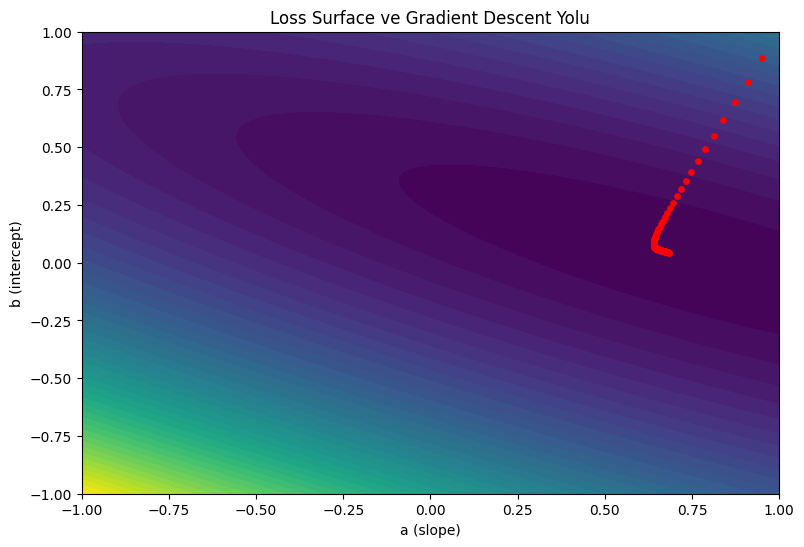

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))

# 2D loss yüzeyi
plt.contourf(range_a, range_b, Z, levels=50)

# Gradient Descent'in izlediği yol (a,b)
plt.scatter(history["a"], history["b"], s=15, c="red")

plt.title("Loss Surface ve Gradient Descent Yolu")
plt.xlabel("a (slope)")
plt.ylabel("b (intercept)")
plt.show()

❓ [isteğe bağlı] Peki ya 3D? Aşağıda aynı veriyi [plot.ly 3D kontur grafiği](https://plotly.com/python/3d-surface-plots/) üzerinde çizmeyi deneyin

In [23]:
import plotly.graph_objects as go

surface = go.Surface(x=range_a, y=range_b, z=Z)
scatter = go.Scatter3d(x=history['a'], y=history['b'], z=history['loss'], mode='markers')
fig = go.Figure(data=[surface, scatter])

#fig.update_layout(title='Loss Function', autosize=False, width=500, height=500)
fig.show()

❓ `kayıp` değerlerinin geçmişini `epoch` sayısının bir fonksiyonu olarak çizin. 0.001'den 0.01'e kadar `learning_rate`'in birden fazla varyasyonuyla deneyin ve farkı anladığınızdan emin olun

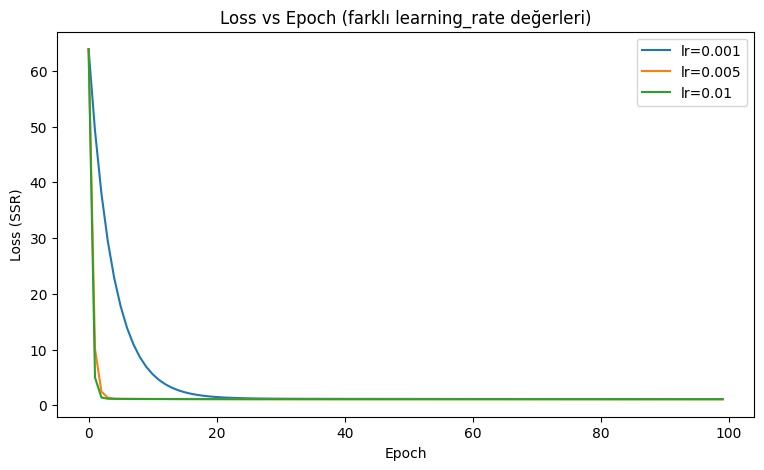

In [24]:
learning_rates = [0.001, 0.005, 0.01]

plt.figure(figsize=(9, 5))

for lr in learning_rates:
    a_lr, b_lr, hist_lr = gradient_descent(
        data_X, data_Y,
        a_init=1, b_init=1,
        learning_rate=lr,
        n_epochs=100
    )
    plt.plot(hist_lr["loss"], label=f"lr={lr}")

plt.title("Loss vs Epoch (farklı learning_rate değerleri)")
plt.xlabel("Epoch")
plt.ylabel("Loss (SSR)")
plt.legend()
plt.show()

## 6. Sklearn ile...

❓ Sklearn kullanarak, aynı veri üzerinde bir Doğrusal Regresyon modeli eğitin. Parametrelerini Gradyan İnişiniz ile hesaplananlarla karşılaştırın.

In [25]:
from sklearn.linear_model import LinearRegression

# Sklearn modelini eğit
lin_reg = LinearRegression()
lin_reg.fit(data_X.reshape(-1, 1), data_Y)

a_sklearn = lin_reg.coef_[0]
b_sklearn = lin_reg.intercept_

print("Gradient Descent (a, b):", a, b)
print("Sklearn        (a, b):", a_sklearn, b_sklearn)

Gradient Descent (a, b): 0.768671510620374 0.00708932115622393
Sklearn        (a, b): 0.7688371715345806 0.0070177202010620054


Hemen hemen aynı olmalıdırlar!

### 🏁 Tebrikler! İşiniz bittiğinde lütfen egzersizinizi push edin